In [1]:
!pip install pandas==1.0.5

In [2]:
#https://analyticsindiamag.com/pyflux-guide-python-library-for-time-series-analysis-and-prediction/
!pip install Pyflux

In [4]:
#Importing required libraries
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import pyflux as pf


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
#Downloading the data
msft = DataReader('MSFT', 'yahoo')
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-24,42.689999,39.720001,40.450001,41.680000,88753700.0,37.878582
2015-08-25,43.240002,40.389999,42.570000,40.470001,70616600.0,36.778946
2015-08-26,42.840000,41.060001,42.009998,42.709999,63408000.0,38.814651
2015-08-27,43.950001,42.930000,43.230000,43.900002,50943200.0,39.896111
2015-08-28,44.150002,43.389999,43.400002,43.930000,28246700.0,39.923386


In [6]:
#Calculating the Stock Returns 
import numpy as np
import pandas as pd
returns = pd.DataFrame(np.diff(np.log(msft['Adj Close'].values)))

#Setting date column as index
returns.index = msft.index.values[1:msft.index.values.shape[0]]

returns.columns = ["Returns"]

returns.head()



,Returns
2015-08-25,-0.029460
2015-08-26,0.053872
2015-08-27,0.027481
2015-08-28,0.000683
2015-08-31,-0.009377


<function matplotlib.pyplot.show>

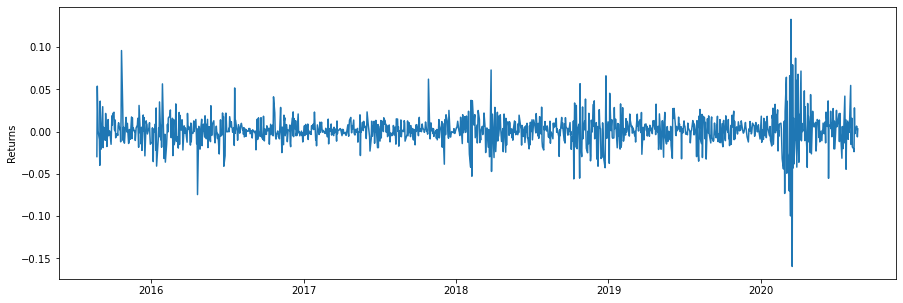

In [7]:
#Visualizing the Data
plt.figure(figsize=(15,5))
plt.ylabel("Returns")
plt.plot(returns)
plt.show

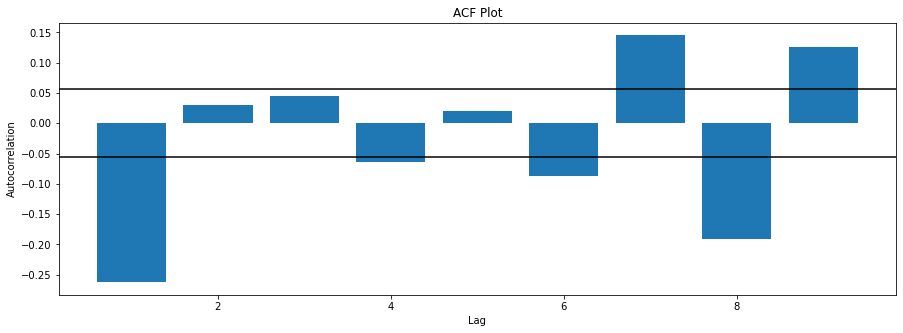

In [8]:
#we will use PyFlux for visualizing the ACR(Auto Correlation) Plot.
pf.acf_plot(returns.values.T[0])

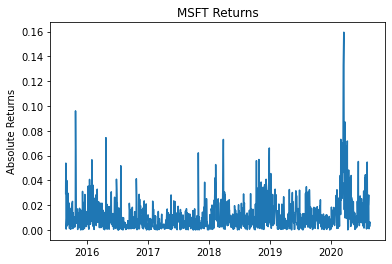

In [9]:
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('MSFT Returns')
plt.show()

In [10]:
#Return analysis using different Models
#Generalized Autoregressive Conditional Heteroskedasticity (GARCH)
gar_model = pf.GARCH(data=returns, p=1, q=1)
gar = gar_model.fit()
gar.summary()

AttributeError: ignored

In [ ]:
gar_model.plot_fit(figsize=(15,5))

In [ ]:
gar_model.plot_predict(h=20, figsize=(15,5))

In [11]:
#ARIMA MODEL
arm_model = pf.ARIMA(data=returns, ar=4, ma=4, target='Returns',  family = pf.Normal())

In [13]:
arm = arm_model.fit("MLE")

In [14]:
arm.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Returns                             Method: MLE                                       
Start Date: 2015-08-31 00:00:00                         Log Likelihood: 3363.5435                         
End Date: 2020-08-20 00:00:00                           AIC: -6707.0871                                   
Number of observations: 1253                            BIC: -6655.7541                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0017     0.0008     2.1942   0.0282   (0.0002 | 0.0032)        
AR(1)                                

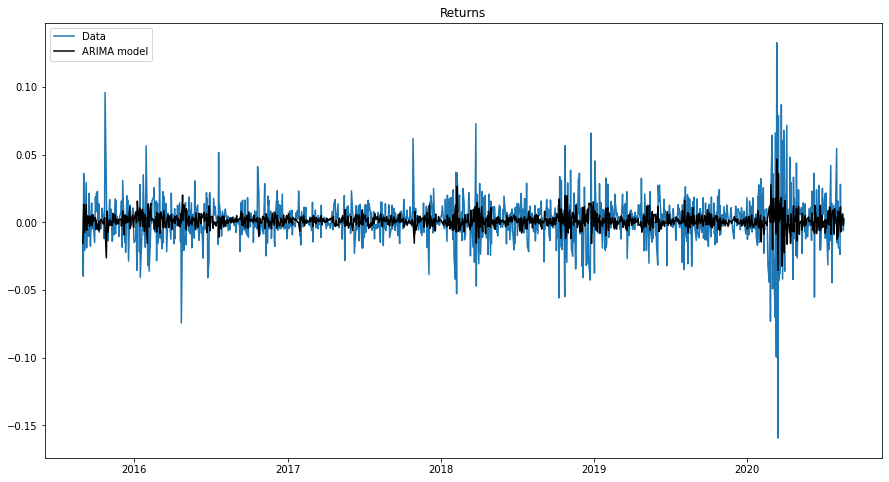

In [15]:
#we will visualize the fit plot and the plot of the predicted values
arm_model.plot_fit(figsize=(15,8))

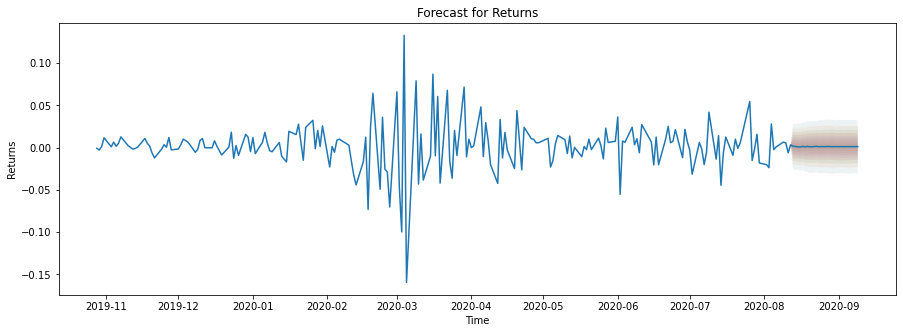

In [16]:
#We will predict the future values with ‘past values = 200’ and 20 steps ahead for forecasting i.e value of h=20.
arm_model.plot_predict(h=20, past_values=200, figsize=(15,5))